# Preliminary Tasks

## Loading Libraries

In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt
import shutil
import zipfile
import os
from tqdm import tqdm_notebook,tnrange
from time import sleep
from IPython.display import clear_output, display

## Defining Functions

In [2]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    plt.figure(figsize=[20,10])
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    
def move_folders(from_dir, to_dir, folder_names):
    for i in folder_names:
        shutil.move(os.path.join(from_dir, i),to_dir)

## Loading Data (CIFAR10)

In [3]:
batch_size = 32
img_trans = transforms.Compose([
    transforms.ToTensor(),
])
train_data = torchvision.datasets.CIFAR10(root= '../data/',
                                       transform = transforms.ToTensor(),
                                       download = True)
test_data = torchvision.datasets.CIFAR10(root = '../data/',
                                      train = False,
                                      transform = transforms.ToTensor(),
                                      download = True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = torch.utils.data.DataLoader(dataset= train_data,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          num_workers = 4)
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                         batch_size = batch_size,
                                         shuffle = True)

# Defining Network

In [13]:
class conv_ae(nn.Module):
    def __init__(self):
        super(conv_ae,self).__init__()
        self.encode = nn.Sequential(
            nn.Conv2d(3,8, kernel_size = 5, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size = 5, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size = 5, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size = 5, stride = 1, padding = 2)
            
        )
        self.decode = nn.Sequential(
            nn.Conv2d(64, 32, kernel_size = 5, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size = 5, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(16, 8, kernel_size = 5, stride = 1, padding = 2),
            nn.ReLU(),
            nn.Conv2d(8,3, kernel_size = 5, stride = 1, padding = 2),
#             nn.Tanh()
        )
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x
    


## Training Network

In [11]:
convo_auto = conv_ae().cuda()
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(convo_auto.parameters(),lr = learning_rate)

num_epochs = 1
t = tqdm_notebook(range(num_epochs))
for i in t:
    for data in train_loader:
        img, _ = data
        img = Variable(img)
        
        output = convo_auto(img.cuda())
        loss = criterion(output, img.cuda())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    t.set_description('Loss: {:.4f}' 
               .format(loss.item()))

torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32

torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32

KeyboardInterrupt: 

## Results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


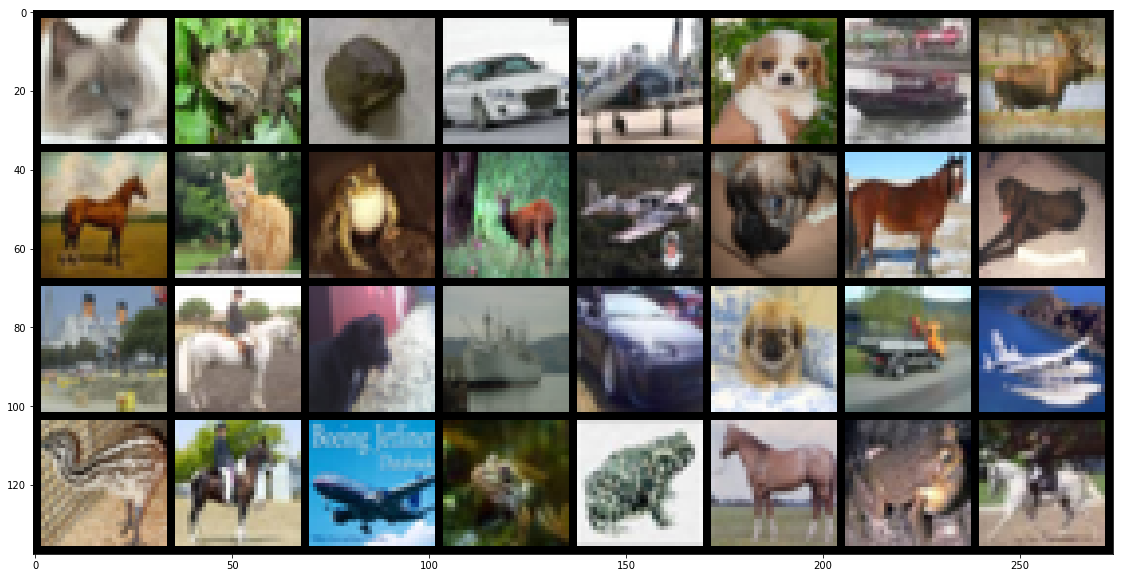

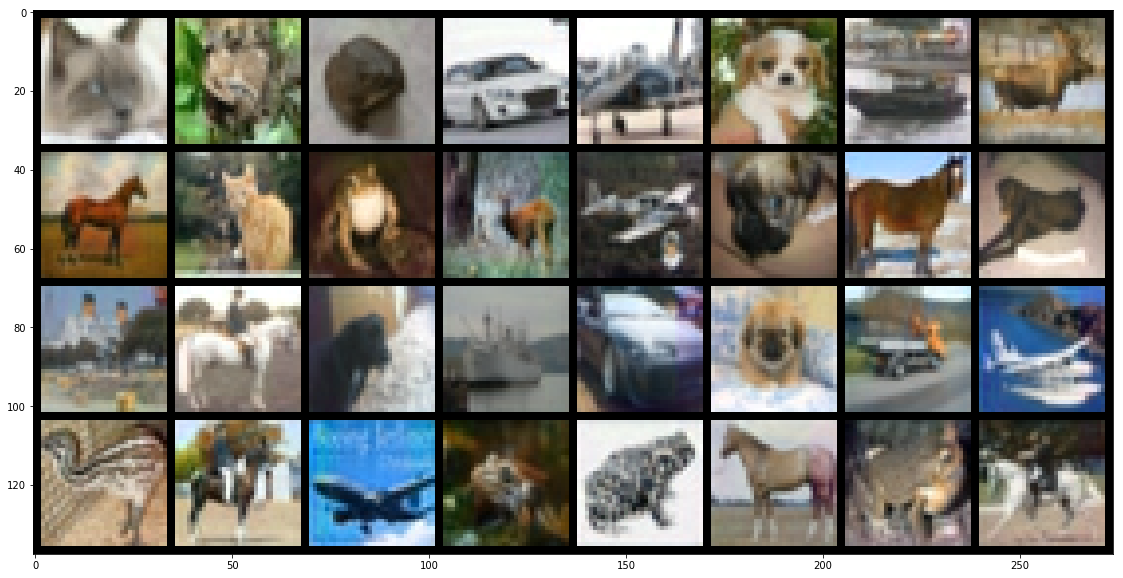

In [48]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
# print('Input Images')
imshow(torchvision.utils.make_grid(images))

# print('Output Images')
outputs = convo_auto(images.cuda()).cpu()
imshow(torchvision.utils.make_grid(outputs).detach())

# Denoising images

In [18]:
train_dataset = torchvision.datasets.ImageFolder(
    root = '../../data/stanford-dogs-dataset/Images/Train',
    transform = transforms.Compose([transforms.Resize((200,200)),
                       transforms.ToTensor()])
)

In [19]:
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(train_dataset,range(0,100)),
                                          batch_size = 4,
                                          num_workers = 0,
                                          shuffle = True)
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(train_dataset,range(100,707)),
                                          batch_size = 4,
                                          num_workers = 0,
                                          shuffle = True)

In [40]:
convo_auto = conv_ae().cuda()
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(convo_auto.parameters(),lr = learning_rate)

num_epochs = 20
t = tqdm_notebook(range(num_epochs))
for i in t:
    for data in train_loader:
        img, _ = data
        img = Variable(img)
        
        noise = torch.tensor(np.random.choice([0,1], p=[0.2,0.8], size=img.size()))
        img1 = img * noise.float()
        
        output = convo_auto(img1.cuda())
        loss = criterion(output, img.cuda())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    t.set_description('Loss: {:.4f}' 
               .format(loss.item()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


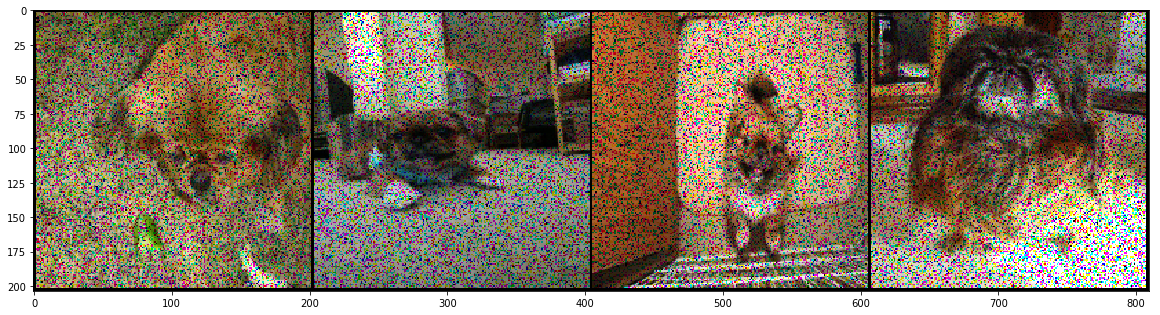

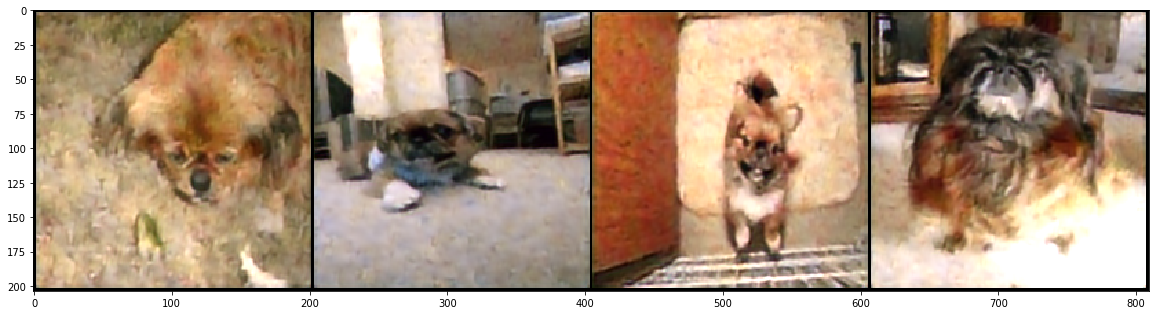

In [41]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

noise = torch.tensor(np.random.choice([0,1], p=[0.2,0.8], size=images.size()))
images = images * noise.float()

imshow(torchvision.utils.make_grid(images))

outputs = convo_auto(images.cuda()).cpu()
imshow(torchvision.utils.make_grid(outputs).detach())